In [31]:
import torch
import torch.nn as nn
import torch.distributions as td
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torch import optim
from torch.autograd import Variable
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.manifold import TSNE

In [32]:
data_dir = "data/"
stocks = pd.read_csv(data_dir + "ex_aktier.csv")
# rates = pd.read_csv(data_dir + "rates_philip.csv", sep=";", decimal=",", index_col = 0, parse_dates=True)
# cmdty = pd.read_csv(data_dir + "cmdty_philip.csv", sep=";", decimal=",", index_col = 0, parse_dates=True)
# index = pd.read_csv(data_dir + "index.csv", index_col =0, parse_dates = True)
# Y = rates.join(cmdty).join(index)


In [33]:
stocks = stocks.pivot(index="Date", columns = "Isin", values="Close")
stocks.index = pd.to_datetime(stocks.index)
stocks = stocks.resample("W-Fri").first()

In [34]:
stocks.head()

Isin,ANN7425Q1095,AU0000057408,BMG0451H1170,BMG0451H1253,BMG0539N1020,BMG060591028,BMG067231032,BMG0702P1086,BMG0716Y1030,BMG0992J1018,...,SE0013647385,SE0013720018,SE0013747870,SE0013748001,SE0013888484,SE0013914249,SG1AD2000008,SG9999002877,VGG3175Q1081,VGG3724W1014
Date,,,,,,,,,,,,,,,,,,,,,
1973-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
X = stocks.pct_change().dropna(how="all")
X[X == 0.0] = np.nan
mu = X.mean()
std = X.std()
X = X.sub(mu, axis=1).div(std, axis=1)

In [36]:
X

Isin,ANN7425Q1095,AU0000057408,BMG0451H1170,BMG0451H1253,BMG0539N1020,BMG060591028,BMG067231032,BMG0702P1086,BMG0716Y1030,BMG0992J1018,...,SE0013647385,SE0013720018,SE0013747870,SE0013748001,SE0013888484,SE0013914249,SG1AD2000008,SG9999002877,VGG3175Q1081,VGG3724W1014
Date,,,,,,,,,,,,,,,,,,,,,
1973-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-06,NaN,-0.547158,-0.089726,NaN,NaN,NaN,1.439298,-0.403623,NaN,NaN,...,-1.095754,NaN,NaN,-2.038810,NaN,-0.697779,NaN,NaN,-1.254242,NaN
2020-03-13,NaN,-1.162599,-2.790779,NaN,NaN,2.717625,-3.915729,-1.241291,NaN,NaN,...,-0.298663,NaN,NaN,-0.140842,NaN,-2.396901,NaN,NaN,NaN,NaN
2020-03-20,NaN,-0.458389,-1.348562,NaN,NaN,NaN,-2.828131,-0.441075,NaN,NaN,...,-1.073244,NaN,NaN,-5.882258,-10.303225,-0.768425,NaN,NaN,NaN,NaN


In [37]:
class Data(Dataset):
    def __init__(self, T, n, num_windows, num_classes = 5, df = None):
        self.T = T
        self.n = n
        self.df = df
        self.num_windows = num_windows
        self.num_classes = num_classes
        self.params = {}
        self.params[0] = (-0.2, 0.5)
        self.params[1] = (0.025, 0.1)
        self.params[2] = (0.0, 0.2)
        self.params[3] = (0.1, 0.2)
        self.params[4] = (0.2, 1.0)
        if df is None:
            self.X, self.y = self._gen_data()
        else:
            self.X, self.y = self._get_data()
        self.loader = DataLoader(self, batch_size=32, shuffle=True)

    def _get_data(self):
        X, y = [], []
        steps = self.df.shape[0] // self.T
        print("STEPS: ", steps)
        for t in range(steps):
            df_t = self.df.iloc[t*self.T:(t+1)*self.T].dropna(axis=1)
            if self.n > 1:
                for i in range(self.num_windows):
                
                    idx = np.random.choice(np.arange(df_t.shape[1]), self.n)
                    df_i = df_t.iloc[:, idx]
                    #df_i = df_i.div(df_i.iloc[0], axis=1)
                    X.append(df_i.values)
                    y.append(t)
            else:
                for i in range(df_t.shape[1]):
                    s = df_t.iloc[:, i]
                    #s = s.div(s.iloc[0])
                    X.append(s.values)
                    y.append(t)
        return np.array(X), np.array([y]).T
        
        
    def _gen_data(self):
        X, y = [], []
        dt = 1/252.
        for i in range(self.num_windows):
            cls = np.random.randint(0, self.num_classes)
            mu, sigma = self.params[cls]
            S = np.zeros((self.T,self.n))
            S[0,:] = 1
            for t in range(1,self.T):
                w = np.random.randn(self.n)
                #s = mu * dt + np.sqrt(dt) * sigma * w
                s = S[t-1] * np.exp((mu - 0.5*sigma**2)*dt + np.sqrt(dt)*sigma*w)
                S[t] = s
            #S = (1.0 + S).cumprod(axis=0)
            X.append(S)
            y.append(cls)
        return np.array(X), np.array([y]).T

    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        x = self.X[idx]
        #x = (x - x.mean(axis=0)) / x.std(axis=0)
        #print(x.shape)
        y = self.y[idx]

        return torch.Tensor(x), torch.Tensor(y)
        

In [38]:
class MVN(nn.Module):
    def __init__(self, i, n):
        super().__init__()
        self.n = n
        self.mu = nn.Linear(i, n)
        #self.log_var = nn.Linear(i, n)
        self.L = nn.Linear(i, n**2)
    
    def forward(self, x):
        mu = self.mu(x)
        #log_var = self.log_var(x)
        L_prim = self.L(x).view(-1, self.n, self.n)#.tril(-1)
        #sigma = torch.exp(0.5 * log_var)
        #L = L_prim + sigma.diag_embed()
        eps = 0.0005
        L = L_prim.bmm(L_prim.transpose(1,2)) + eps * torch.ones((x.size(0),self.n)).diag_embed()
        return td.MultivariateNormal(mu, L)

class ST(nn.Module):
    def __init__(self, i, n):
        super().__init__()
        self.n = n
        self.df = nn.Linear(i, n)
        self.mu = nn.Linear(i, n)
        self.log_var = nn.Linear(i, n)
    
    def forward(self, x):
        df = self.df(x)
        df = torch.exp(df)
        mu = self.mu(x)
        log_var = self.log_var(x)
        sigma = torch.exp(0.5 * log_var)
        return td.StudentT(df, mu, sigma)

class Latent(nn.Module):
    def __init__(self, i, n):
        super().__init__()
        self.mu = nn.Linear(i, n)
        self.log_var = nn.Linear(i, n)
    
    def _rep(self, mu, log_var):
        sigma = torch.exp(0.5 * log_var)
        eps = torch.randn_like(sigma)
        return mu + sigma * eps
    
    def forward(self, x):
        mu = self.mu(x)
        log_var = self.log_var(x)
        z = self._rep(mu, log_var)
        return z, mu, log_var
        
class Simple(nn.Module):
    def __init__(self, T, n, n_z):
        super().__init__()
        self.T = T
        self.n = n
        
        self.enc = nn.Sequential(
            nn.Linear(T*n, 125),
            nn.LeakyReLU(0.2),
            nn.Linear(125, 250),
            nn.LeakyReLU(0.2),
            Latent(250, n_z)
        )
        """self.dec = nn.Sequential(
            nn.Linear(n_z, 10),
            nn.ELU(),
            nn.Linear(10, 25),
            nn.ELU(),
            nn.Linear(25, n)
        )
        self.dist = ST(n, n)
        """
        
        self.dec = nn.Sequential(
            nn.Linear(n_z, 125),
            nn.LeakyReLU(0.2),
            nn.Linear(125, T*n)
        )
        self.mse = nn.MSELoss(reduction="sum")
        
    def encode(self, x, return_loss = False):
        x = x.flatten(1)
        z, mu, log_var =  self.enc(x)
        if return_loss:
            dkl = -0.5*torch.sum(1 + log_var - mu.pow(2) - log_var.exp(), dim=1)
            return z, mu, log_var, dkl
        return z, mu, log_var
    
    def decode2(self, z):
        x = self.dec(z)
        dist = self.dist(x)
        x_list = []
        for t in range(self.T):
            x_list.append(dist.sample().unsqueeze(1))
        gen_x = torch.cat(x_list, dim=1)
        return gen_x, dist
    
    def decode(self,z):
        return self.dec(z)
    
    def _reg_loss(self):
        loss = 0
        lam = 0.005
        for m in self.parameters():
            loss += m.abs().sum()
        return loss*lam
    
    def _rcl_loss(self, x, dist):
        loss = 0
        for t in range(self.T):
            x_t = x[:, t, :]
            loss -= dist.log_prob(x_t).sum(dim=-1)
        return loss
    
    def forward(self, x, beta = 1.0):
        z, mu, log_var, dkl = self.encode(x, True)
        #gen_x, dist = self.decode(z)
        gen_x = self.decode(z)
        #rcl = self._rcl_loss(x,dist)
        rcl = self.mse(gen_x, x.flatten(1))
        #reg = self._reg_loss()
        return gen_x, torch.mean(rcl + dkl*beta )
                

In [39]:
def gen(T,n, nw):
    X = []

In [40]:
T = 52
n = 5
vae = Simple(T,n,64)
data = Data(T, n, 50, df = X.iloc[-1000:])
opt = optim.Adam(vae.parameters(), lr=1e-3)
sched = optim.lr_scheduler.ReduceLROnPlateau(opt, patience=3, verbose=True)

STEPS:  19


In [41]:
epochs = 300
losses = []
beta = 0
for e in range(epochs):
    tot_loss = 0
    if e > 10:
        beta = 1
    for i, (x,y) in enumerate(data.loader):
        opt.zero_grad()
        gen_x, loss = vae(x,beta)
        loss.backward()
        opt.step()
        tot_loss += loss.item()
    print(f"Epoch: {e+1}, Loss: {tot_loss / len(data)}")
    losses.append(tot_loss)
    sched.step(tot_loss)
    

Epoch: 1, Loss: 249.82488795230262
Epoch: 2, Loss: 220.1698103412829
Epoch: 3, Loss: 197.26259971217107
Epoch: 4, Loss: 185.25190532483552
Epoch: 5, Loss: 176.06685495476972
Epoch: 6, Loss: 168.65052631578948
Epoch: 7, Loss: 162.4910205078125
Epoch: 8, Loss: 156.9860693359375
Epoch: 9, Loss: 151.75360659950658
Epoch: 10, Loss: 147.2245638877467
Epoch: 11, Loss: 143.3172915810033
Epoch: 12, Loss: 148.56288060238487
Epoch: 13, Loss: 143.37559698807567
Epoch: 14, Loss: 140.4721525493421
Epoch: 15, Loss: 137.92210552014802
Epoch: 16, Loss: 135.6452580180921
Epoch: 17, Loss: 133.36525596217106
Epoch: 18, Loss: 131.21463892886513
Epoch: 19, Loss: 129.25716796875
Epoch: 20, Loss: 127.50667120682566
Epoch: 21, Loss: 125.78757092927631
Epoch: 22, Loss: 124.29366313733553
Epoch: 23, Loss: 122.89308028371711
Epoch: 24, Loss: 121.5367829975329
Epoch: 25, Loss: 120.28350688733552
Epoch: 26, Loss: 119.29919407894737
Epoch: 27, Loss: 118.14259380139802
Epoch: 28, Loss: 116.90095497532894
Epoch: 29, L

Epoch: 229, Loss: 77.93296862150494
Epoch: 230, Loss: 77.88191393400493
Epoch: 231, Loss: 77.8847175678454
Epoch: 232, Loss: 77.86816239206415
Epoch: 233, Loss: 77.87387990851151
Epoch: 234, Loss: 77.86962736430921
Epoch: 235, Loss: 77.84477192125823
Epoch: 236, Loss: 77.82099596525494
Epoch: 237, Loss: 77.82428325452302
Epoch: 238, Loss: 77.8223812705592
Epoch: 239, Loss: 77.81800909745066
Epoch: 240, Loss: 77.80032200863486
Epoch: 241, Loss: 77.76629381681744
Epoch: 242, Loss: 77.77059506064967
Epoch: 243, Loss: 77.74847681949014
Epoch: 244, Loss: 77.76529849403784
Epoch: 245, Loss: 77.76624845805921
Epoch: 246, Loss: 77.71981612356086
Epoch: 247, Loss: 77.72008236533718
Epoch: 248, Loss: 77.68627826891448
Epoch: 249, Loss: 77.71756257709704
Epoch: 250, Loss: 77.67308298211348
Epoch: 251, Loss: 77.6833349609375
Epoch: 252, Loss: 77.66063887746711
Epoch: 253, Loss: 77.6304886667352
Epoch: 254, Loss: 77.62575786389803
Epoch: 255, Loss: 77.66330784847862
Epoch: 256, Loss: 77.61128006784

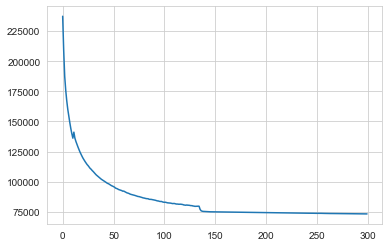

In [42]:
plt.plot(losses)

torch.Size([22, 260])


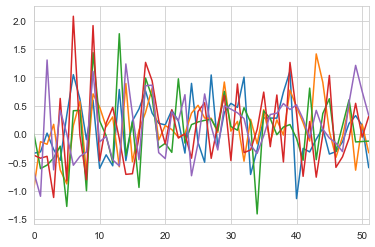

In [43]:
print(gen_x.shape)
gen_xx = pd.DataFrame(gen_x.cpu().detach().numpy()[0].reshape(T,n))
#(1.0 + gen_xx).cumprod().plot(legend=False)
gen_xx.plot(legend=False)
#plt.imshow(gen_x.cpu().detach().numpy()[0].reshape(T, n))

torch.Size([22, 52, 5])


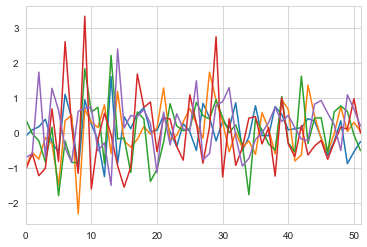

In [44]:
print(x.shape)
xx = pd.DataFrame(x.cpu().detach().numpy()[0].reshape(T,n))
#(1.0 + xx).cumprod().plot(legend=False)
xx.plot(legend=False)
#plt.imshow(x.cpu().detach().numpy()[0].reshape(T, n))

In [45]:
print(len(data))
x = data[55:][0]
print(x.shape)
z, mu, log_var = vae.encode(x)
gen_x = vae.decode(z)

950
torch.Size([895, 52, 5])


torch.Size([895, 260])


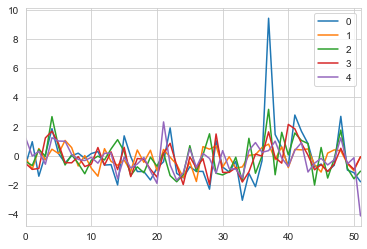

In [46]:
print(gen_x.shape)
gen_xx = pd.DataFrame(gen_x.cpu().detach().numpy()[0].reshape(T,n))
#(1.0 + gen_xx).cumprod().plot(legend=False)
gen_xx.plot()
#plt.imshow(gen_x.cpu().detach().numpy()[0].reshape(T, n))

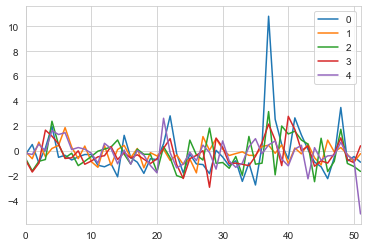

In [47]:
xx = pd.DataFrame(x.cpu().detach().numpy()[0].reshape(T,n))
#(1.0 + xx).cumprod().plot(legend=False)
xx.plot()
#plt.imshow(x.cpu().detach().numpy()[0].reshape(T, n))

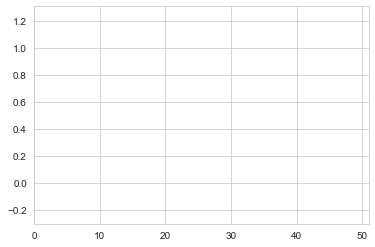

In [48]:
x1 = stocks.iloc[-1000:, 44:(44+n)].iloc[-(20+T):-19].fillna(method="pad").pct_change()[1:]
x1.index = pd.to_datetime(x1.index)
x1_df = x1.copy()
mu1 = x1.mean()
std1 = x1.std()
x1 = x1.sub(mu1, axis=1).div(std1, axis=1)
x1 = torch.Tensor(x1.values).unsqueeze(0)
z, mu, log_var = vae.encode(x1)
gen_x = vae.decode(z).view(-1, T, n)
gen_x = pd.DataFrame(gen_x[0].detach().numpy())
gen_x = gen_x.mul(std1.values, axis=1).add(mu1.values, axis=1)
_ = (1.0 + gen_x).cumprod().plot(legend=False)



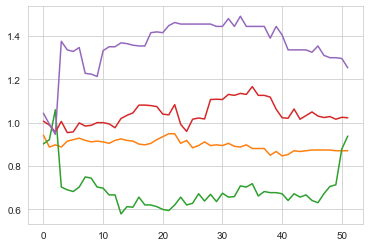

In [49]:
_ = plt.plot((1.0 + x1_df).cumprod().values)

950
torch.Size([300, 52, 5])
torch.Size([300, 64])


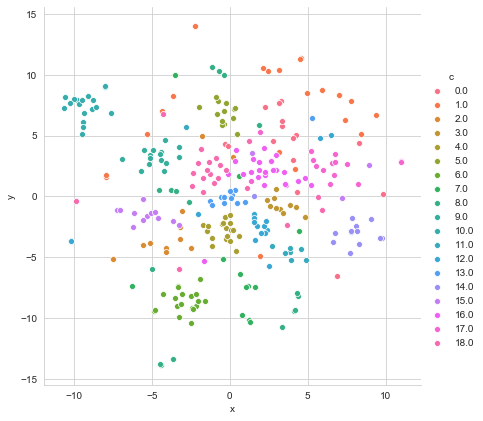

In [50]:
print(len(data))
idx = np.random.choice(np.arange(len(data)), 300, replace=False)
X, y = data[idx]
print(X.shape)
#X = X.view(X.size(0), X.size(2) * X.size(1))
X = X
Z1, mu, log_var = vae.encode(X)
print(Z1.shape)
l = Z1.cpu().detach().numpy()
l = TSNE(perplexity=40).fit_transform(l)
df = pd.DataFrame({"x": l[:,0], "y":l[:,1], "c" : y.numpy()[:,0]})
g = sns.pairplot(x_vars="x", y_vars = "y", hue="c",height=6, data=df)

# g = sns.pairplot(x_vars="x", y_vars = "y", hue="c",height=6, data=df[df.c == 0])
# g = sns.pairplot(x_vars="x", y_vars = "y", hue="c",height=6, data=df[df.c == 1])
# g = sns.pairplot(x_vars="x", y_vars = "y", hue="c",height=6, data=df[df.c == 2])
# Z1.shape

In [51]:
Z1.mean(dim=0), Z1.std(dim=0)

(tensor([ 0.4860,  0.2779,  0.0866,  0.2263, -0.3110, -0.1488, -0.1751, -0.2386,
          0.0164, -0.0328,  0.2579, -0.0604, -0.0459, -0.0903, -0.2823, -0.2106,
         -0.0518,  0.2580, -0.0485,  0.1199,  0.2250,  0.0462,  0.2189,  0.2834,
         -0.1365, -0.0397, -0.0941, -0.1954,  0.0248,  0.0899,  0.1372, -0.0935,
          0.2685, -0.0049, -0.1426,  0.0614,  0.0096, -0.1124,  0.0307,  0.2202,
          0.2763, -0.3871,  0.4918,  0.0143,  0.0309,  0.0165,  0.0497,  0.2072,
          0.4062, -0.4889,  0.0995, -0.0113, -0.2800,  0.0698, -0.2166, -0.1365,
          0.2204,  0.1648,  0.0486,  0.1124,  0.1126, -0.3537,  0.0513,  0.0028],
        grad_fn=<MeanBackward1>),
 tensor([1.5855, 1.4682, 1.5571, 1.5683, 1.4585, 1.4348, 1.2959, 1.3657, 1.4342,
         1.6174, 1.4794, 1.4739, 1.5198, 1.4494, 1.3679, 1.4376, 1.4384, 1.5353,
         1.5987, 1.4965, 1.4522, 1.2991, 1.4358, 1.4262, 1.5326, 1.3854, 1.3316,
         1.4402, 1.2549, 1.5274, 1.3614, 1.4498, 1.3997, 1.4647, 1.3685, 1

In [52]:
def grad(x, mu):
    return x - mu

def sgd(x, vae):
    N = 3000
    z_list = []
    for i in range(N):
        z, mu, log_var = vae.encode(x.view(x.size(0), x.size(1)*x.size(2)).to(device))
        z_list.append(mu)
        x_z, mu, sigma = vae.decode(z)
        x = x - 0.0003 / np.sqrt(i+1)*grad(x, mu, sigma)
    return torch.cat(z_list).cpu().detach().numpy()

def adam(x, vae, N = 2000, alpha = 0.001):
    beta_1 = 0.9
    beta_2 = 0.999
    eps = 1e-8
    z_list = []
    m = 0
    v = 0
    for i in range(N):
        z, mu, log_var = vae.encode(x)
        z_list.append(mu.unsqueeze(1))
        gen_x = vae.decode(z)
        g = grad(x, gen_x)
        m = beta_1*m + (1-beta_1)*g
        v = beta_2*v + (1-beta_2)*torch.pow(g, 2)
        m_hat = m/(1-beta_1**(i+1))
        v_hat = v/(1-beta_2**(i+1))
        x = x - alpha*m_hat/(torch.sqrt(v_hat)+eps) / np.sqrt(i+1)
    return torch.cat(z_list, dim=1).cpu().detach().numpy()

(1, 200, 64)

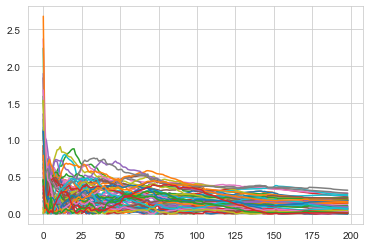

In [53]:
i = np.random.randint(0, len(data))
x_0, y = data[i]
x_0 = x_0.unsqueeze(0).flatten(1)
diffs = []
z_list = adam(x_0, vae, N =200, alpha=1)
diffs = np.abs(np.diff(z_list, axis=1))
plt.plot(diffs[0])
z_list.shape

In [54]:
with torch.no_grad():
    M = len(data) // 2
    z_first_list = []
    z_list = []
    idx = np.random.choice(np.arange(len(data)), M, replace=False)
    X, y = data[idx]
    #for m in range(M):
    #    if m % 10 == 0:
    #        print(m)
    #    x_n = X[m:3].to(device)
    zz = adam(X.flatten(1), vae, N = 300, alpha = 1)
    print(zz.shape)
    z_list.append(zz[:, -1, :])
    z_first_list.append(zz[:, 0, :])

(475, 300, 64)


(475, 64)
(475, 2)


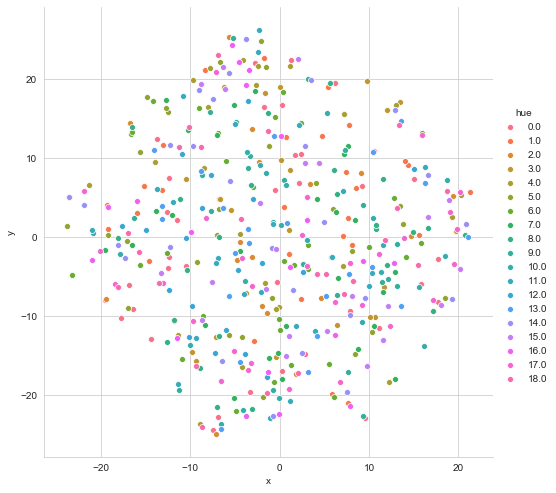

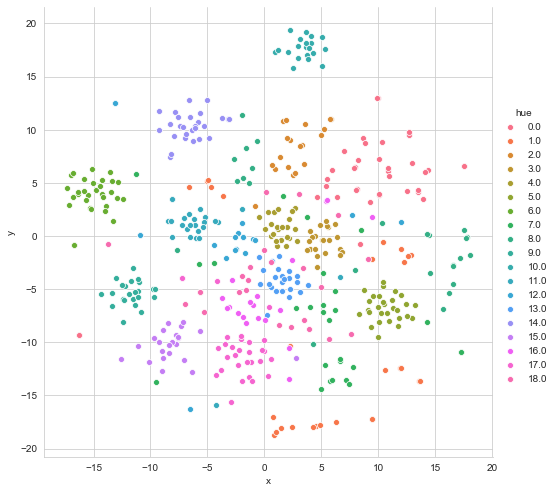

In [55]:
#z = torch.cat(z_list)
#zz = z.cpu().detach().numpy()
zz = np.array(z_list)[0]
print(zz.shape)
zz = TSNE(perplexity=40).fit_transform(zz)
df = pd.DataFrame({"x":zz[:,0], "y":zz[:,1], "hue": y.cpu().detach().numpy()[:,0]})
sns.pairplot(df, x_vars="x", y_vars="y", hue="hue", height=7)
zz = np.array(z_first_list)[0]
zz = TSNE(perplexity=40).fit_transform(zz)
print(zz.shape)
df = pd.DataFrame({"x":zz[:,0], "y":zz[:,1], "hue": y.cpu().detach().numpy()[:,0]})
sns.pairplot(df, x_vars="x", y_vars="y", hue="hue", height=7)

In [56]:
vae.eval()

Simple(
  (enc): Sequential(
    (0): Linear(in_features=260, out_features=125, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=125, out_features=250, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Latent(
      (mu): Linear(in_features=250, out_features=64, bias=True)
      (log_var): Linear(in_features=250, out_features=64, bias=True)
    )
  )
  (dec): Sequential(
    (0): Linear(in_features=64, out_features=125, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=125, out_features=260, bias=True)
  )
  (mse): MSELoss()
)